# Random forest and XGBoost model for binary black holes

Fatıma Rabia Yapıcıoglu (2049536), Asal Rangraziasi(2046832),  Giulia Bellentani (2027590), Pu Yin (2005501)

In [1]:
import pandas as pd
import random
import numpy as np
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("merged_outputs.csv")

#### READING OUTPUT.CSV FILE
For binary systems the stellar properties are placed before the binary properties. The name of the stellar properties columns have a suffix _0 or _1 for the primary and secondary star, respectively. <br>
The columns in the output csv file are:

0. ID: ID of that binary system (it corresponds to its position in the input file) 
1. Name: unique identifier of the system, randomly drawn at the beginning of the evolution 
2. Mass_0: total mass of the star in Msun
3. MHE_0: mass of the Helium core of the star in Msun
4. MCO_0: mass of the Carbon/Oxigen core of the star in Msun
5. Radius_0: radius of the star in Rsun 
6. RHE_0: radius of Helium core in Rsun         
7. RCO_0: radius of the Carbon/Oxigen core in Rsun          
8. Luminosity_0: luminosity of the star in Lsun   
9. Temperature_0: effective temperature  of the star in Kelvin (temperature of a black body that would emit the same total amount of electromagnetic radiation.
10. Lambda_0: unused in this project    
11. Phase_0: SEVN stellar phase (phase of the simulation, number from 1 to 7)       
12. PhaseBSE_0:    
13. RemnantType_0: type of the final product of the stellar life (black hole/neutron star/white dwarf) 
14. Zams_0:    

(15 - 27) Same properties for the second star 

28. Semimajor: orbital semimajor axis of the binary in Rsun
29. Eccentricity: orbital eccentricity of the binary 
30. GWtime: in Myr        
31. BWolrdtime: time elapsed in the simulations in Myr (starting always from 0)
32. BEvent:


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11405940 entries, 0 to 11405939
Data columns (total 34 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   ID             int64  
 2   name           object 
 3   Mass_0         float64
 4   MHE_0          float64
 5   MCO_0          float64
 6   Radius_0       float64
 7   RHE_0          float64
 8   RCO_0          float64
 9   Luminosity_0   float64
 10  Temperature_0  float64
 11  Lambda_0       float64
 12  Phase_0        int64  
 13  PhaseBSE_0     float64
 14  RemnantType_0  int64  
 15  Zams_0         float64
 16  Mass_1         float64
 17  MHE_1          float64
 18  MCO_1          float64
 19  Radius_1       float64
 20  RHE_1          float64
 21  RCO_1          float64
 22  Luminosity_1   float64
 23  Temperature_1  float64
 24  Lambda_1       float64
 25  Phase_1        int64  
 26  PhaseBSE_1     float64
 27  RemnantType_1  int64  
 28  Zams_1         float64
 29  Semimajor   

In [4]:
df.describe()

,Unnamed: 0,ID,Mass_0,MHE_0,MCO_0,Radius_0,RHE_0,RCO_0,Luminosity_0,Temperature_0,...,Lambda_1,Phase_1,PhaseBSE_1,RemnantType_1,Zams_1,Semimajor,Eccentricity,GWtime,BWorldtime,BEvent
count,1.140594e+07,1.140594e+07,1.101501e+07,1.101501e+07,1.101501e+07,1.101501e+07,1.101501e+07,1.101501e+07,1.101501e+07,1.101501e+07,...,3.379834e+06,1.140594e+07,1.140594e+07,1.140594e+07,1.140594e+07,8.929772e+06,8.929772e+06,8.929772e+06,1.140594e+07,1.140594e+07
mean,5.702970e+06,5.001094e+05,9.907307e+00,2.290187e+00,3.901745e-01,5.262284e+01,5.204316e-01,1.044170e-02,9.264498e+04,1.067243e+05,...,7.882656e-01,2.759363e+00,3.757750e+00,6.346868e-03,9.212906e+00,4.975743e+03,1.846735e-01,1.016522e+20,5.352121e+01,1.487364e+00
std,3.292611e+06,2.886388e+05,1.582470e+01,7.719818e+00,3.418105e+00,1.725626e+02,4.864518e+00,5.090469e-02,4.310298e+05,2.989568e+05,...,7.762265e-01,2.278677e+00,4.681663e+00,7.574085e-01,1.139680e+01,7.860896e+04,2.249166e-01,8.116165e+21,8.218948e+01,3.316219e+00
min,0.000000e+00,0.000000e+00,3.122491e-01,0.000000e+00,0.000000e+00,1.278428e-05,0.000000e+00,0.000000e+00,1.000000e-10,5.569800e+02,...,1.257552e-01,1.000000e+00,1.000000e+00,-1.000000e+00,3.600008e-01,2.947162e-02,0.000000e+00,2.331601e-05,0.000000e+00,-1.000000e+00
25%,2.851485e+06,2.501660e+05,1.193223e+00,0.000000e+00,0.000000e+00,7.079578e-03,0.000000e+00,0.000000e+00,9.024713e-02,1.541861e+04,...,5.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,3.727440e+00,2.309002e+01,7.699887e-03,1.408322e+05,1.028574e+01,0.000000e+00
50%,5.702970e+06,5.001290e+05,5.314675e+00,8.072019e-08,0.000000e+00,3.750035e-01,3.086640e-08,0.000000e+00,2.048564e+03,2.828194e+04,...,5.986290e-01,1.000000e+00,1.000000e+00,0.000000e+00,5.849900e+00,8.595155e+01,9.610000e-02,1.840863e+07,3.026579e+01,0.000000e+00
75%,8.554454e+06,7.500910e+05,1.181128e+01,1.650859e+00,0.000000e+00,9.130722e+00,2.492864e-01,0.000000e+00,2.013534e+04,6.694708e+04,...,9.989920e-01,4.000000e+00,4.000000e+00,0.000000e+00,9.730700e+00,1.297362e+03,2.753994e-01,4.115902e+11,6.352431e+01,3.000000e+00
max,1.140594e+07,9.999990e+05,2.967587e+02,2.166298e+02,1.991020e+02,2.366384e+03,1.367179e+02,1.413096e+00,1.275851e+07,6.756760e+06,...,1.000000e+02,7.000000e+00,1.500000e+01,6.000000e+00,1.490212e+02,1.244851e+08,9.999964e-01,2.230152e+25,8.727068e+02,1.700000e+01


## DATA PREPROCESSING

First of all, we keep only the phase 7 of the simulation, when the two stars have become remnants.
A remnant is the final product of the stellar life: it could be a black hole, a neutron star or a white dwarf. 


In [5]:
display(len(df['Phase_0']==7))
df_7 = df[(df['Phase_0']==7) & (df['Phase_1']==7)]
print('Number of first star remnant rows:', len(df['Phase_0']==7))
print('Number of second star remnant rows:', len(df['Phase_1']==7))
print('Number of systems in which both stars are now remnants:', len(df_7))

11405940

Number of first star remnant rows: 11405940
Number of second star remnant rows: 11405940
Number of systems in which both stars are now remnants: 836441


Then we select the first row and the last row of the dataframe, creating two different subdataframes. 

In [6]:
new_df_initial = df_7.groupby('ID').first().reset_index()
new_df_last = df_7.groupby('ID').last().reset_index()

The "new_df_last" dataframe is useful to create the final "merging/non merging" label that will be appended to the "new_df_initial" dataframe as its new last column. Selecting only the rows with RemnantType_0 and RemnantType_1 both equal to 6 keeps only the binary systems finally composed by two black holes (a binary black hole -BBH-).

In [7]:
new_df_last.loc[ (new_df_last['RemnantType_0'] == 6) & (new_df_last['RemnantType_1'] == 6), 'bbh' ]=1
new_df_last.loc[ (new_df_last['RemnantType_0'] != 6) | (new_df_last['RemnantType_1'] != 6), 'bbh' ]=0

print('Number of binary black holes:', len(new_df_last[new_df_last['bbh']==1]))
print('Number of systems of a different kind:', len(new_df_last[new_df_last['bbh']==0]))


Number of binary black holes: 43617
Number of systems of a different kind: 792824


This is the last step to create the label: the "GWtime" column value for that row should be less that the lifetime of the universe in Myr (13700.0 Myr). This means that that BBH is able to merge in due time. <br>
The column values above this threshold and the column values equal to Nan are instead linked to non merging systems: the first ones are too slow, the second ones are not a BBH anymore at the end of the simulation.

In [8]:
new_df_last['mrg/nonmrg'] = 0
new_df_last.loc[ new_df_last['GWtime']  < 13700.0 , 'mrg/nonmrg' ]=1 #merging

print('Number of merging systems:', len(new_df_last[new_df_last['mrg/nonmrg']==1]))
print('Number of non merging systems:', len(new_df_last[new_df_last['mrg/nonmrg']==0]))
print('Number of Nans check:',new_df_last['mrg/nonmrg'].isna().values.sum())

Number of merging systems: 36858
Number of non merging systems: 799583
Number of Nans check: 0


Here we append the "mrg/nonmrg" labels obtained from the "new_df_last" dataframe to the "new_df_initial" dataframe. We decided to discard all the systems that are not BBH.

In [9]:
labels = new_df_last.loc[:,['mrg/nonmrg','bbh']]
final_data = pd.concat([new_df_initial, labels], axis=1)
final_data_bbh = final_data[final_data['bbh']==1]
final_data_bbh.drop(columns="bbh", inplace=True)

Now we have the final dataframe ("final_data_bbh"), the one that we will give to the machine learning algorithms.

In [10]:
final_data_bbh.head(10)

,ID,Unnamed: 0,name,Mass_0,MHE_0,MCO_0,Radius_0,RHE_0,RCO_0,Luminosity_0,...,Phase_1,PhaseBSE_1,RemnantType_1,Zams_1,Semimajor,Eccentricity,GWtime,BWorldtime,BEvent,mrg/nonmrg
17,22,6845413,0_176896908826503,22.83387,0.0,0.0,0.000097,0.0,0.0,1.000000e-10,...,7,14.0,6,34.458750,20.48373,0.010823,8.870617e+02,4.021467,0,1
94,116,6846412,0_657068005842330,16.03915,0.0,0.0,0.000068,0.0,0.0,1.000000e-10,...,7,14.0,6,13.334920,210.22390,0.136709,9.331661e+07,8.521450,0,0
108,132,6846595,0_550951566446625,30.79572,0.0,0.0,0.000131,0.0,0.0,1.000000e-10,...,7,14.0,6,23.486700,9069.38900,0.299891,1.975471e+13,7.781825,0,0
117,141,6846721,0_770606230539095,21.46868,0.0,0.0,0.000091,0.0,0.0,1.000000e-10,...,7,14.0,6,36.171270,35.10415,0.007964,7.802381e+03,4.307154,0,1
121,148,6846782,0_663735736747492,11.95312,0.0,0.0,0.000051,0.0,0.0,1.000000e-10,...,7,14.0,6,10.859440,127.73930,0.176603,2.959608e+07,7.662994,0,0
138,166,6847010,0_128178925369444,12.46999,0.0,0.0,0.000053,0.0,0.0,1.000000e-10,...,7,14.0,6,9.493662,141.88190,0.024428,2.969498e+07,8.735236,0,0
140,169,6847044,0_269541901132273,15.13629,0.0,0.0,0.000064,0.0,0.0,1.000000e-10,...,7,14.0,6,21.497050,160.23690,0.199951,1.089868e+07,5.920945,0,0
145,174,6847127,0_267690239111620,30.16701,0.0,0.0,0.000128,0.0,0.0,1.000000e-10,...,7,14.0,6,31.424790,150.07260,0.207694,1.657209e+06,4.371454,0,0
150,179,6847210,0_141004598564401,33.17828,0.0,0.0,0.000141,0.0,0.0,1.000000e-10,...,7,14.0,6,78.069400,163306.00000,0.242915,8.276018e+17,3.432118,0,0
152,181,6847241,0_786680202494961,17.90454,0.0,0.0,0.000076,0.0,0.0,1.000000e-10,...,7,14.0,6,14.581130,67.46797,0.060981,6.825432e+05,7.267396,0,0


In [11]:
final_data_bbh.columns

Index(['ID', 'Unnamed: 0', 'name', 'Mass_0', 'MHE_0', 'MCO_0', 'Radius_0',
       'RHE_0', 'RCO_0', 'Luminosity_0', 'Temperature_0', 'Lambda_0',
       'Phase_0', 'PhaseBSE_0', 'RemnantType_0', 'Zams_0', 'Mass_1', 'MHE_1',
       'MCO_1', 'Radius_1', 'RHE_1', 'RCO_1', 'Luminosity_1', 'Temperature_1',
       'Lambda_1', 'Phase_1', 'PhaseBSE_1', 'RemnantType_1', 'Zams_1',
       'Semimajor', 'Eccentricity', 'GWtime', 'BWorldtime', 'BEvent',
       'mrg/nonmrg'],
      dtype='object')

## HEATMAP
Before running the algorithms, we plot a heatmap with the aim to get a glimpse of the eventual direct or inverse correlations between some of the involved parameters. 

In [12]:
heatmap_data = final_data_bbh.loc[:,['Mass_0', 'Mass_1', 'Radius_0', 'Radius_1', 'Zams_0', 'Zams_1', 'Semimajor', 'Eccentricity', 'GWtime', 'mrg/nonmrg']]

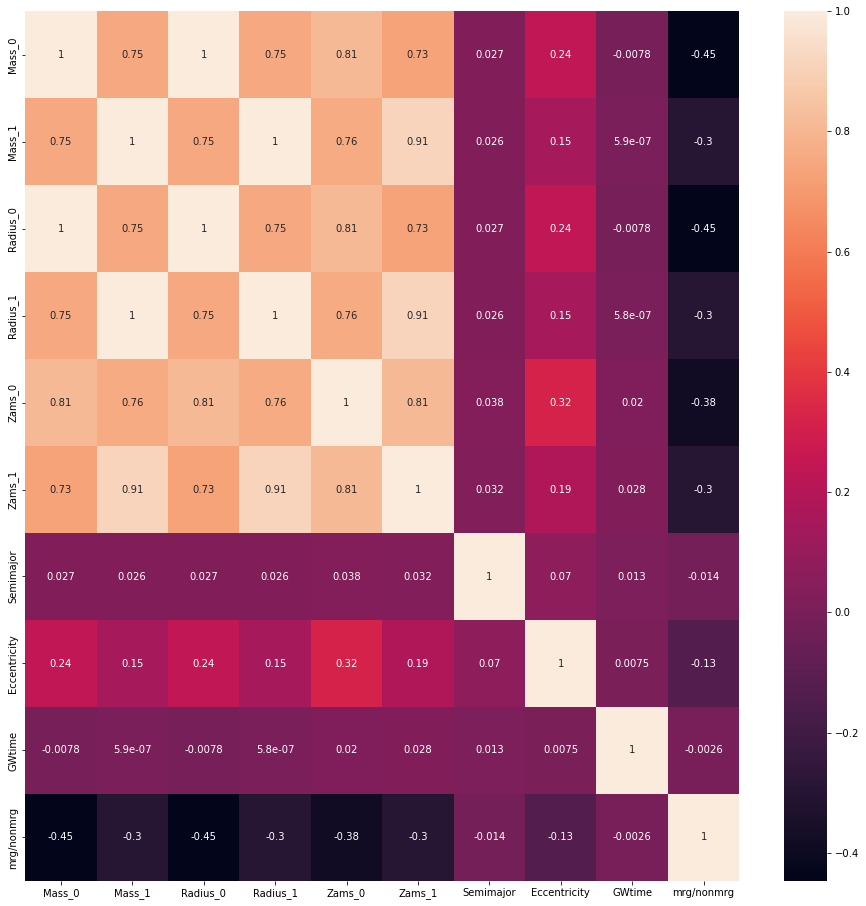

In [13]:
plt.figure(figsize=(16, 16))
sns.heatmap(heatmap_data.corr(),annot=True);

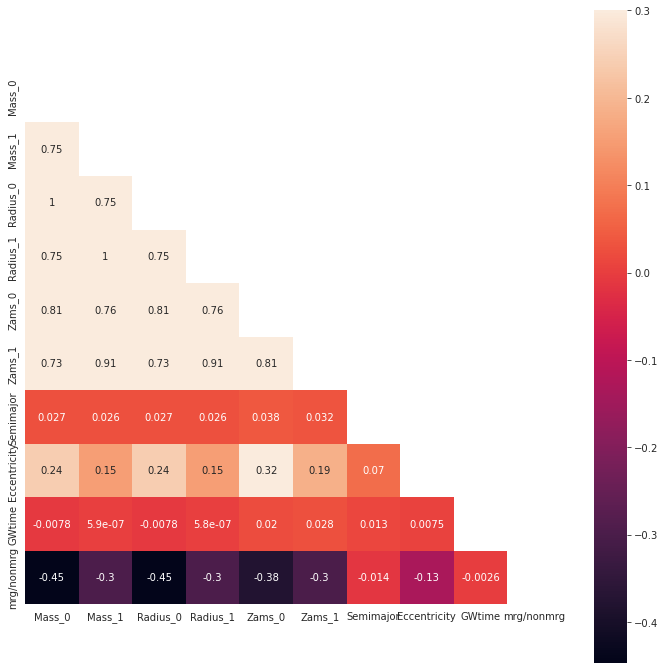

In [14]:
corr = heatmap_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True)

## COMMON LAST PREPROCESSING STEPS
We select the significative columns, divide the input data from the labels and split it all in training set (70%) and test set (30%). We also plot a heatmap with the aim to get a glimpse of the eventual direct or inverse correlations between the selected features.  

In [15]:
filtered_data = final_data_bbh.loc[:,['Mass_0','Mass_1','Radius_0','Radius_1','Semimajor',
       'Eccentricity', 'BWorldtime', 'mrg/nonmrg']]

<AxesSubplot:>

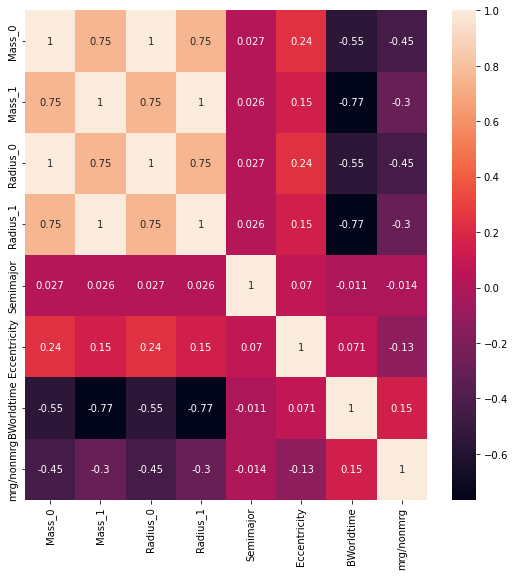

In [16]:
plt.figure(figsize=(9, 9))
sns.heatmap(filtered_data.corr(),annot=True)

In [17]:
mrg_bbh = filtered_data[filtered_data['mrg/nonmrg']==1]
nonmrg_bbh = filtered_data[filtered_data['mrg/nonmrg']==0]
print(len(mrg_bbh ),len(nonmrg_bbh ))


8151 35466


In [18]:
#mrg 40%, nonmrg 60%, mrg:nonmrg=1:1.5
num_nonmrg_bbh = int(len(mrg_bbh )*1.5)

#random choice in non black holes
idx = list(np.random.choice(np.arange(1,len(nonmrg_bbh)), num_nonmrg_bbh, replace=False))
nonmrg_bbh= nonmrg_bbh.iloc[idx,:]
print(len(mrg_bbh),len(nonmrg_bbh))

8151 12226


In [19]:
filtered_data = pd.concat([mrg_bbh,nonmrg_bbh])
filtered_data= shuffle(filtered_data)

<AxesSubplot:>

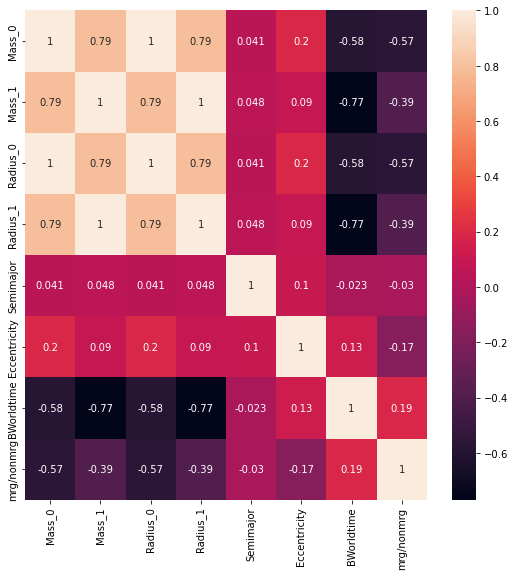

In [20]:
plt.figure(figsize=(9, 9))
sns.heatmap(filtered_data.corr(),annot=True)

In [21]:
X = filtered_data.iloc[:,:-1]
y = filtered_data.iloc[:,-1:]

In [22]:
X = X.fillna(0)
y = y.fillna(0)

In [23]:
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## RANDOM FOREST

In [24]:
rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,15,20,25],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose=3)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.985 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.985 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.984 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.980 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.982 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.985 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.985 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.983 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=5, max_feat

[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.993 total time=   4.4s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.995 total time=   4.6s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100;, score=0.995 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100;, score=0.996 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100;, score=0.996 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100;, score=0.993 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100;, score=0.995 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200;, score=0.995 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200;, score=0.996 total time=

[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=500;, score=0.998 total time=   4.6s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=500;, score=0.995 total time=   4.4s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, n_estimators=500;, score=0.995 total time=   4.5s
[CV 1/5] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100;, score=0.996 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100;, score=0.996 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100;, score=0.997 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100;, score=0.996 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100;, score=0.995 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=200;, score=0.995 total time=

[CV 2/5] END criterion=gini, max_depth=25, max_features=log2, n_estimators=500;, score=0.996 total time=   4.5s
[CV 3/5] END criterion=gini, max_depth=25, max_features=log2, n_estimators=500;, score=0.998 total time=   4.4s
[CV 4/5] END criterion=gini, max_depth=25, max_features=log2, n_estimators=500;, score=0.995 total time=   4.5s
[CV 5/5] END criterion=gini, max_depth=25, max_features=log2, n_estimators=500;, score=0.995 total time=   4.5s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.971 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.975 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.975 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.974 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=100;, score=0.974 t

[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.994 total time=   2.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.995 total time=   2.1s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.993 total time=   5.3s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.993 total time=   5.3s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.996 total time=   5.6s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.993 total time=   5.5s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.994 total time=   5.5s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100;, score=0.994 total time=   1.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=10

[CV 1/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=200;, score=0.996 total time=   2.1s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=200;, score=0.996 total time=   2.2s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=200;, score=0.997 total time=   2.3s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=200;, score=0.995 total time=   2.1s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=200;, score=0.994 total time=   2.1s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=500;, score=0.995 total time=   5.6s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=500;, score=0.997 total time=   5.6s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=500;, score=0.998 total time=   5.6s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, n_estimators=50

[CV 3/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=100;, score=0.996 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=100;, score=0.995 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=100;, score=0.994 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=200;, score=0.996 total time=   2.1s
[CV 2/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=200;, score=0.997 total time=   2.1s
[CV 3/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=200;, score=0.999 total time=   2.2s
[CV 4/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=200;, score=0.996 total time=   2.1s
[CV 5/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=200;, score=0.994 total time=   2.2s
[CV 1/5] END criterion=entropy, max_depth=25, max_features=log2, n_estimators=50

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 200}

Using "GridSearchCV.predict" directly will yield the same results as getting the best hyper-parameter through "GridSearchCV.best_param_" and then using it in the random forest classifier

In [25]:
y_pred=CV_rfc.predict(X_test)

<BarContainer object of 7 artists>

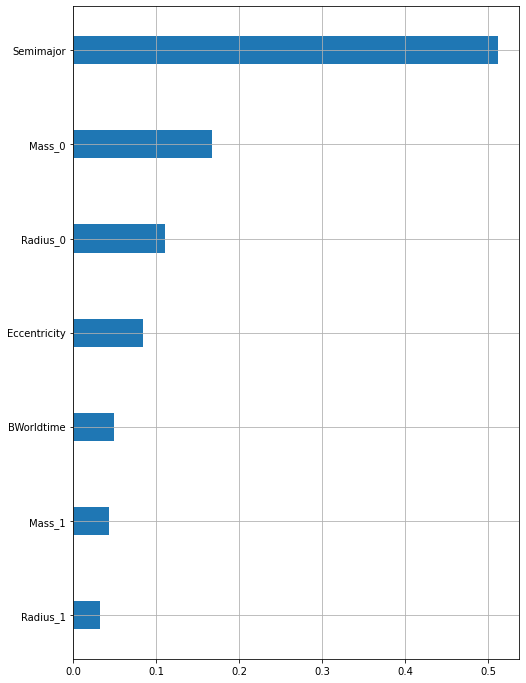

In [26]:
feat_imp_df = pd.DataFrame({"Feature":X.columns, "Importance": CV_rfc.best_estimator_.feature_importances_})
feat_imp_df_desc= feat_imp_df.sort_values("Importance",ascending=True)
plt.figure(figsize=(8, 12))
plt.grid()
plt.barh("Feature","Importance", data=feat_imp_df_desc, height=0.3)

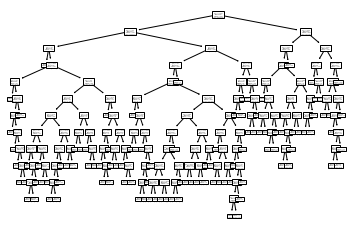

In [27]:
plot_tree(CV_rfc.best_estimator_.estimators_[0])
plt.show()

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9970559371933267


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3657
           1       1.00      1.00      1.00      2457

    accuracy                           1.00      6114
   macro avg       1.00      1.00      1.00      6114
weighted avg       1.00      1.00      1.00      6114



In [30]:
#CONFUSION MATRIX 
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[3645   12]
 [   6 2451]]


## XGBoost model
First of all, we convert the dataframes X and Y into an optimized data structure called Dmatrix that XGBoost supports, granting best performances (it improves both memory efficiency and training speed).

In [31]:
data_dmatrix = xgb.DMatrix(data=X,label=y) 

In [32]:
parameters = { 'colsample_bytree': [0.1,0.3,0.5,0.8,1],'learning_rate': [0.01,0.1,0.6,0.8,1], 'max_depth': [1,3,5,8,10], 'reg_alpha':[0] }

In [33]:
estimator = xgb.XGBClassifier(colsample_bytree = 0.8, learning_rate = 1,
                max_depth = 1, reg_alpha=0 , n_estimators = 50)
                # n_estimators = 50 means 50 trees

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[22:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=1, max_delta_step=None,
                                     max_depth=1, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=0,
                                     reg_lambda=None, scale_pos_weight=None,
                      

In [34]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods

preds_2 = grid_search.predict(X_test)

In [35]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

<Figure size 576x864 with 0 Axes>

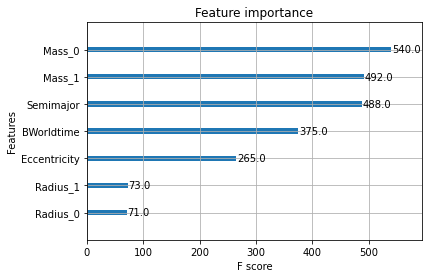

In [36]:
plt.figure(figsize=(8, 12))
xgb.plot_importance(grid_search.best_estimator_)
plt.rcParams['figure.figsize'] = [8, 12]
plt.show()

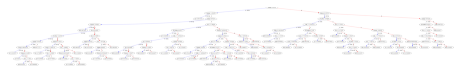

In [37]:
#fig, tree = plt.subplots(figsize=(30, 30))
xgb_train = xgb.train(params=grid_search.best_params_, dtrain=data_dmatrix, num_boost_round=20)
xgb.plot_tree(xgb_train, num_trees=0)
#plt.rcParams['figure.figsize'] = [200, 200]
plt.show()

In [38]:
xgb.plot_tree(xgb_train, num_trees=1)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.984822 to fit


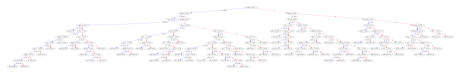

In [39]:
xgb.plot_tree(xgb_train, num_trees=2)
plt.show()

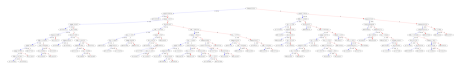

In [40]:
xgb.plot_tree(xgb_train, num_trees=3)
plt.show()

In [41]:
print(classification_report(y_test, preds_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3657
           1       1.00      1.00      1.00      2457

    accuracy                           1.00      6114
   macro avg       1.00      1.00      1.00      6114
weighted avg       1.00      1.00      1.00      6114



In [42]:
#CONFUSION MATRIX 
cf_matrix_2 = confusion_matrix(y_test, preds_2)
print(cf_matrix_2)

[[3645   12]
 [  10 2447]]


## RESULTS COMPARISON
Direct comparison between confusion matrices, accuracies, precisions, recalls and f1 scores from the random forest and from the XGBoost model. <br> 
The following function takes a confusion matrix as an argument and pretty prints all the results mentioned above.

In [43]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=(8,8),
                          cmap='Blues',
                          title=None):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [44]:
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
categories = ['Zero', 'One']

Pretty printing of the results for the random forest:

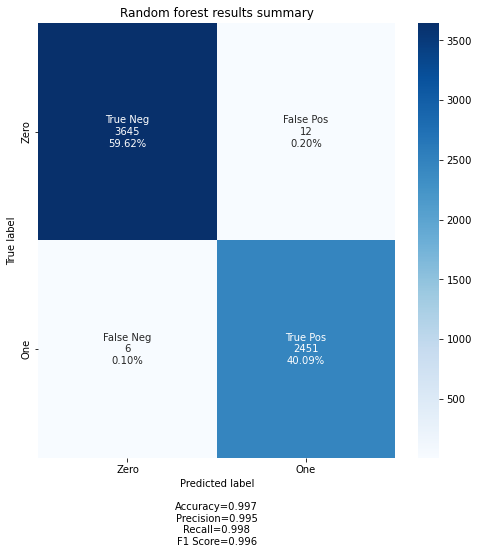

In [45]:
make_confusion_matrix(cf_matrix,
                      group_names=group_names,
                      categories=categories, 
                      cmap='Blues',
                      title="Random forest results summary")

Pretty printing of the results for the XGBoost model:

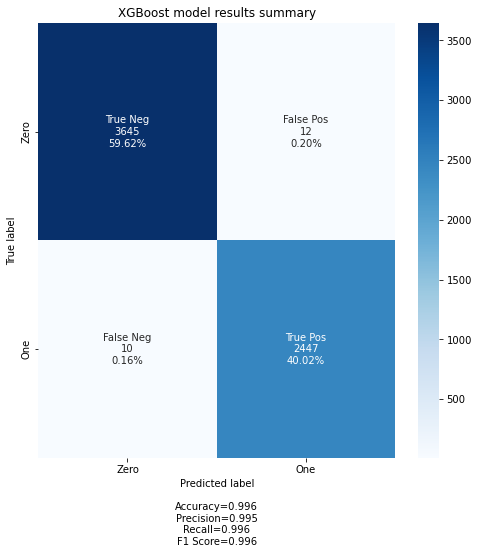

In [46]:
make_confusion_matrix(cf_matrix_2,
                      group_names=group_names,
                      categories=categories, 
                      cmap='Blues',
                      title="XGBoost model results summary")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e6d886b-e60a-4c5b-ad77-020e7f429015' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>